In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
data_path= '/content/drive/My Drive/INTERN_2022/DRUG/data/sensitivity_data/new_aug2/' 

In [5]:
GDSC=pd.read_csv(data_path+'GDSC_paired_common_with_gcsi.csv', index_col=0)
gCSI=pd.read_csv(data_path+'gCSI_paired_common_with_gdsc.csv', index_col=0)

In [6]:
GDSC_x = GDSC.iloc[:, 0:-1]
GDSC_y = GDSC.iloc[:, -1]

In [7]:
gCSI = gCSI.reset_index()
gCSI = gCSI.drop(columns='index')

In [8]:
gCSI_x = gCSI.iloc[:, 0:-1]
gCSI_y = gCSI.iloc[:, -1]

In [9]:
gCSI_x.iloc[0:2, 0:-20]

,155,864,53,681,50,707,667,102,548,26,...,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202
0,7.209434,5.274817,6.520254,5.407016,5.441268,6.193294,4.710726,7.727200,4.280433,5.037682,...,3.776118,3.251995,-0.23223,-2.542907,-1.106178,-1.244095,-2.526046,-4.232081,-0.197347,0
1,7.694390,4.846773,5.213439,4.534354,6.048548,5.649415,5.006172,7.226347,9.675669,4.332932,...,3.776118,3.251995,-0.23223,-2.542907,-1.106178,-1.244095,-2.526046,-4.232081,-0.197347,0


In [10]:
gCSI_x.iloc[:, 0:-21] = StandardScaler().fit_transform(gCSI_x.iloc[:, 0:-21])
GDSC_x.iloc[:, 0:-21] = StandardScaler().fit_transform(GDSC_x.iloc[:, 0:-21])


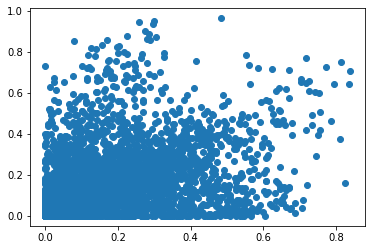

In [13]:
import matplotlib.pyplot as plt

plt.scatter(gCSI_y, GDSC_y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

gCSI_X_train, gCSI_X_test, gCSI_y_train, gCSI_y_test = train_test_split(gCSI_x, gCSI_y, test_size = 0.30, random_state = 42) 
GDSC_X_train, GDSC_X_test, GDSC_y_train, GDSC_y_test = train_test_split(GDSC_x, GDSC_y,test_size = 0.30, random_state = 42)

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import plotly.express as px
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestRegressor

# Create linear regression object
# change to RandomForestRegressor() while needed 
m1 = RandomForestRegressor(max_depth = 4)#linear_model.Ridge()
m2=  RandomForestRegressor(max_depth = 4)#linear_model.Ridge()

In [ ]:
# in-study results: GDSC
m1.fit(GDSC_X_train, GDSC_y_train)

# Make predictions using the testing set
GDSC_y_pred = m1.predict(GDSC_X_test)


# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(GDSC_y_test, GDSC_y_pred))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(GDSC_y_test, GDSC_y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(GDSC_y_test, GDSC_y_pred))

Mean squared error: 0.01
Mean absolute error: 0.07
Coefficient of determination: 0.57


In [ ]:
#mixed study results trained on GDSC (70%)

mixed_x_test = pd.concat([GDSC_X_test, gCSI_X_test], ignore_index=True)
mixed_y_test = pd.concat([GDSC_y_test, gCSI_y_test], ignore_index=True)

mixed_y_pred_m1 = m1.predict(mixed_x_test)

print("Mean squared error: %.2f" % mean_squared_error(mixed_y_test, mixed_y_pred_m1))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(mixed_y_test, mixed_y_pred_m1))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(mixed_y_test, mixed_y_pred_m1))


Mean squared error: 0.02
Mean absolute error: 0.09
Coefficient of determination: 0.26


In [ ]:


#trained on gCSI 70% data , tested on 30% gCSI

m2.fit(gCSI_X_train, gCSI_y_train)

# Make predictions using the testing set
gCSI_y_pred = m2.predict(gCSI_X_test)

# The coefficients
#print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(gCSI_y_test, gCSI_y_pred))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(gCSI_y_test, gCSI_y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(gCSI_y_test, gCSI_y_pred))

Mean squared error: 0.01
Mean absolute error: 0.07
Coefficient of determination: 0.54


In [ ]:
#mixed study results trained on gCSI (70%)

mixed_y_pred_m2 = m2.predict(mixed_x_test)

print("Mean squared error: %.2f" % mean_squared_error(mixed_y_test, mixed_y_pred_m2))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(mixed_y_test, mixed_y_pred_m2))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(mixed_y_test, mixed_y_pred_m2))

Mean squared error: 0.02
Mean absolute error: 0.09
Coefficient of determination: 0.17


In [ ]:
#mixed model m5
#train on mixed dataset and test on mixed dataset

m5=  RandomForestRegressor(max_depth=4)#linear_model.Ridge()

mixed_x_train = pd.concat([GDSC_X_train, gCSI_X_train], ignore_index=True)
mixed_y_train = pd.concat([GDSC_y_train, gCSI_y_train], ignore_index=True)

m5.fit(mixed_x_train, mixed_y_train)

#make predictions on the combined test data

mixed_y_pred_m5 = m5.predict(mixed_x_test)   

print("Mean squared error: %.2f" % mean_squared_error(mixed_y_test, mixed_y_pred_m5))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(mixed_y_test, mixed_y_pred_m5))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(mixed_y_test, mixed_y_pred_m5))


Mean squared error: 0.01
Mean absolute error: 0.09
Coefficient of determination: 0.38


In [ ]:
GDSC_y_train_pred = m1.predict(GDSC_X_train)
gCSI_y_train_pred = m2.predict(gCSI_X_train)

best that can be done on training sets

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(gCSI_y_train, gCSI_y_train_pred))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(gCSI_y_train, gCSI_y_train_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(gCSI_y_train, gCSI_y_train_pred))

Mean squared error: 0.01
Mean absolute error: 0.07
Coefficient of determination: 0.62


In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(GDSC_y_train, GDSC_y_train_pred))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(GDSC_y_train, GDSC_y_train_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(GDSC_y_train, GDSC_y_train_pred))

Mean squared error: 0.01
Mean absolute error: 0.07
Coefficient of determination: 0.64


WA method

In [ ]:
avg_y_pred = (GDSC_y_pred + gCSI_y_pred)/2

In [ ]:
avg_y_pred = pd.Series(avg_y_pred)

In [ ]:
avg_y_pred_stacked = pd.concat([avg_y_pred, avg_y_pred], ignore_index=True)

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(mixed_y_test, avg_y_pred_stacked))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(mixed_y_test, avg_y_pred_stacked))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(mixed_y_test, avg_y_pred_stacked))

Mean squared error: 0.01
Mean absolute error: 0.09
Coefficient of determination: 0.38


do a linear regression on the training scores

In [ ]:
m4 = linear_model.LinearRegression()

In [ ]:
m4.fit(gCSI_y_train_pred.reshape(-1, 1), GDSC_y_train_pred.reshape(-1,1))

# Make predictions using the testing set
GDSC_y_pred_m4 = m4.predict(gCSI_y_pred.reshape(-1,1))

#avg GDSC values predicted by m4 + gCSI input y values  to m4 
gCSI = (GDSC_y_pred_m4 + gCSI_y_pred.reshape(-1,1))/2

#print(gCSI)
print("Mean squared error: %.2f" % mean_squared_error(gCSI_y_test, gCSI))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(gCSI_y_test, gCSI))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(gCSI_y_test, gCSI))

Mean squared error: 0.01
Mean absolute error: 0.08
Coefficient of determination: 0.48


In [ ]:
m3 =linear_model.LinearRegression()

In [ ]:
m3.fit(GDSC_y_train_pred.reshape(-1, 1), gCSI_y_train_pred.reshape(-1,1))

# Make predictions using the testing set
gCSI_y_pred_m3 = m3.predict(GDSC_y_pred.reshape(-1,1))

GDSC = (gCSI_y_pred_m3 + GDSC_y_pred.reshape(-1,1))/2
print("Mean squared error: %.2f" % mean_squared_error(GDSC_y_test, GDSC))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(GDSC_y_test, GDSC))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(GDSC_y_test, GDSC))

Mean squared error: 0.01
Mean absolute error: 0.09
Coefficient of determination: 0.48


In [ ]:
GDSC = pd.Series(GDSC.squeeze())
gCSI =pd.Series(gCSI.squeeze())

In [ ]:
#proposed model's results are stored in concated
concated = pd.concat([GDSC, gCSI], ignore_index=True)

In [ ]:
#test on mixed data 

print("Mean squared error: %.2f" % mean_squared_error(mixed_y_test, concated))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(mixed_y_test, concated))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(mixed_y_test, concated))

Mean squared error: 0.01
Mean absolute error: 0.08
Coefficient of determination: 0.48


cross

In [ ]:
#baseline 

# Make predictions using the testing set
GDSC_y_pred_m2 = m2.predict(GDSC_X_test)
print("Mean squared error: %.2f" % mean_squared_error(GDSC_y_test, GDSC_y_pred_m2))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(GDSC_y_test, GDSC_y_pred_m2))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(GDSC_y_test, GDSC_y_pred_m2))

Mean squared error: 0.05
Mean absolute error: 0.14
Coefficient of determination: -0.06


In [ ]:
#Baseline
# Make predictions using the testing set
gCSI_y_pred_m1 = m1.predict(gCSI_X_test)
print("Mean squared error: %.2f" % mean_squared_error(gCSI_y_test, gCSI_y_pred_m1))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(gCSI_y_test, gCSI_y_pred_m1))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(gCSI_y_test, gCSI_y_pred_m1))

Mean squared error: 0.05
Mean absolute error: 0.14
Coefficient of determination: -4.80


In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(gCSI_y_test, GDSC_y_pred))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(gCSI_y_test, GDSC_y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(gCSI_y_test, GDSC_y_pred))

Mean squared error: 0.05
Mean absolute error: 0.14
Coefficient of determination: -4.70


In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(gCSI_y_test, GDSC_y_pred_m3))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(gCSI_y_test, GDSC_y_pred_m3))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(gCSI_y_test, GDSC_y_pred_m3))

Mean squared error: 0.02
Mean absolute error: 0.11
Coefficient of determination: -0.87
